# Numerical Simulation Laboratory                                                         
                                        Department of Physics, University of Milan(It)
                                        Spring 2020 
                                                                     Mattia Corigliano
## 11<sup>th </sup> Computational Exercise

## Machine Learning

In [313]:
# useful libraries
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, activations
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects

##  setting the Layout
import matplotlib as mpl
## LINES
mpl.rcParams['lines.linewidth'] = 2
mpl.rcParams['lines.linestyle'] = '-'
## AXES
mpl.rcParams['axes.linewidth'] = 1 ## edge linewidth
mpl.rcParams['axes.grid'] = True ## display grid or not
mpl.rcParams['axes.titlesize'] = 16 ## fontsize of the axes title
#mpl.rcParams['axes.titleweight'] = 'bold'
mpl.rcParams['axes.labelsize'] = 14  ## fontsize of the x any y labels
mpl.rcParams['axes.formatter.limits'] = [-2,6] # use scientific notation if log10
mpl.rcParams['axes.formatter.use_mathtext'] = True # When True, use mathtext for scientific
mpl.rcParams['legend.fontsize'] = 12
## TICKS
mpl.rcParams['xtick.labelsize'] = 12 ## fontsize of the tick labels
mpl.rcParams['ytick.labelsize'] = 12 
mpl.rcParams['xtick.minor.visible'] = False ## visibility of minor ticks on x-axis
mpl.rcParams['ytick.minor.visible'] = False
## FIGURE
mpl.rcParams['figure.titleweight'] = 'bold' ## weight of the figure title
mpl.rcParams['figure.subplot.wspace'] = 0.4
mpl.rcParams['figure.subplot.hspace'] = 0.4
## ERRORBARS
mpl.rcParams['errorbar.capsize'] = 2  ## length of end cap on error bars in pixels

###   A. Linear Regression

We start by considering the problem of training a NN to fit a linear function:

$$
f(x)=mx+b
$$

#### --> Setting the regreession problem

In [314]:
m = 2 # slope
b = 1 # intersect

#### --> Generate training and validation set

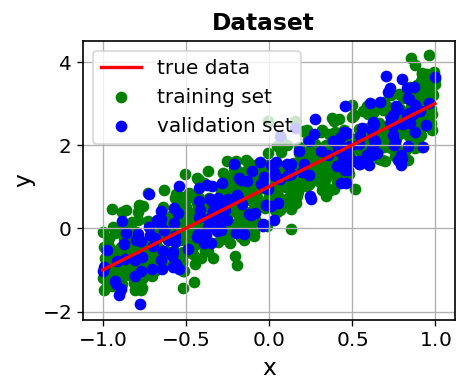

In [315]:
## SIZE OF THE DATASET
Npoints = 1000 ## number of points in the dataset 
Ntrain = int(0.8*Npoints) ## number of points in the training set
Nvalid = int(0.2*Npoints) ## number of points in the validation set

np.random.seed(0) ## fixing seed for reproducibility
x_train = np.random.uniform(-1, 1, Ntrain)
x_valid = np.random.uniform(-1, 1, Nvalid)
x_valid.sort()
y_target = m * x_valid + b # ideal (target) linear function
sigma = 0.5 # gaussian noise on the training and validation set
y_train = np.random.normal(m * x_train + b, sigma) # actual measures
y_valid = np.random.normal(m * x_valid + b, sigma)

# plot training and target dataset
plt.figure(figsize=(4, 3), dpi=120)
plt.suptitle('Dataset', size=14)
mpl.rcParams['figure.subplot.top'] = 0.9
plt.plot(x_valid, y_target, color='red', label = 'true data')
plt.scatter(x_train, y_train, color = 'green', label = 'training set')
plt.scatter(x_valid, y_valid, color='blue', label = 'validation set')
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

#### ---> Define the NN structure

In [316]:
Nnodes_in = 1  ## input size
Nnodes_out = 1 ## output size

models = []

## DEFINE DIFFERENT MODELS

## 1. No Hidden Layer / linear activation function /
models.append(tf.keras.Sequential())
models[0].add(Dense(Nnodes_out, input_shape=(Nnodes_in,), activation = 'linear'))

## 2. No Hidden Layer / nonlinear activation function
models.append(tf.keras.Sequential())
models[1].add(Dense(Nnodes_out, input_shape=(Nnodes_in,), activation = 'tanh'))

## 3. 1 Hidden Layer / nonlinear activation functions
models.append(tf.keras.Sequential())
models[2].add(Dense(16, input_shape=(Nnodes_in,), activation = 'tanh'))
models[2].add(Dense(Nnodes_out, activation = 'linear'))

## optimizer
##opt = tf.keras.optimizers.Adam(learning_rate=0.01,
##    beta_1=0.9,
##    beta_2=0.999,
##    epsilon=1e-07,
##    amsgrad=False)

## compile the model
for model in models:
    model.compile(optimizer='sgd', loss='mse', metrics=['mse'])

# get a summary 
for model in models:
    model.summary()

Model: "sequential_129"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_191 (Dense)            (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_130"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_192 (Dense)            (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_131"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_193 (Dense)            (None, 16)                32        
_________________________________________________________________
dense_194 (Dense

#### --> Define the learning protocol and train the NN

In [317]:
Nepochs = [100, 100, 100]
bs = 32 ## typical values are 32 64 128 256

# report training progress against validation data
history = []
i = 1
for model in models:
    print("\n***Training model {}:*** ".format(i))
    history.append(model.fit(x=x_train, 
                             y=y_train, 
                             batch_size=bs, 
                             epochs=Nepochs[i-1],
                             shuffle=True,
                             validation_data=(x_valid, y_valid)))
    i = i+1
# return weights
for model in models:
    model.get_weights()


***Training model 1:*** 
Epoch 1/100
25/25 [==============================] - 0s 6ms/step - loss: 1.3772 - mse: 1.3772 - val_loss: 1.0770 - val_mse: 1.0770
Epoch 2/100
25/25 [==============================] - 0s 4ms/step - loss: 0.8273 - mse: 0.8273 - val_loss: 0.7131 - val_mse: 0.7131
Epoch 3/100
25/25 [==============================] - 0s 4ms/step - loss: 0.5738 - mse: 0.5738 - val_loss: 0.5347 - val_mse: 0.5347
Epoch 4/100
25/25 [==============================] - 0s 4ms/step - loss: 0.4438 - mse: 0.4438 - val_loss: 0.4395 - val_mse: 0.4395
Epoch 5/100
25/25 [==============================] - 0s 3ms/step - loss: 0.3701 - mse: 0.3701 - val_loss: 0.3824 - val_mse: 0.3824
Epoch 6/100
25/25 [==============================] - 0s 4ms/step - loss: 0.3242 - mse: 0.3242 - val_loss: 0.3464 - val_mse: 0.3464
Epoch 7/100
25/25 [==============================] - 0s 3ms/step - loss: 0.2943 - mse: 0.2943 - val_loss: 0.3221 - val_mse: 0.3221
Epoch 8/100
25/25 [==============================] - 0s 4

Epoch 63/100
25/25 [==============================] - 0s 4ms/step - loss: 0.2257 - mse: 0.2257 - val_loss: 0.2642 - val_mse: 0.2642
Epoch 64/100
25/25 [==============================] - 0s 4ms/step - loss: 0.2257 - mse: 0.2257 - val_loss: 0.2642 - val_mse: 0.2642
Epoch 65/100
25/25 [==============================] - 0s 5ms/step - loss: 0.2257 - mse: 0.2257 - val_loss: 0.2643 - val_mse: 0.2643
Epoch 66/100
25/25 [==============================] - 0s 6ms/step - loss: 0.2257 - mse: 0.2257 - val_loss: 0.2643 - val_mse: 0.2643
Epoch 67/100
25/25 [==============================] - 0s 4ms/step - loss: 0.2257 - mse: 0.2257 - val_loss: 0.2643 - val_mse: 0.2643
Epoch 68/100
25/25 [==============================] - 0s 3ms/step - loss: 0.2257 - mse: 0.2257 - val_loss: 0.2643 - val_mse: 0.2643
Epoch 69/100
25/25 [==============================] - 0s 4ms/step - loss: 0.2257 - mse: 0.2257 - val_loss: 0.2643 - val_mse: 0.2643
Epoch 70/100
25/25 [==============================] - 0s 9ms/step - loss: 0.

Epoch 25/100
25/25 [==============================] - 0s 4ms/step - loss: 0.9709 - mse: 0.9709 - val_loss: 0.9970 - val_mse: 0.9970
Epoch 26/100
25/25 [==============================] - 0s 4ms/step - loss: 0.9691 - mse: 0.9691 - val_loss: 0.9951 - val_mse: 0.9951
Epoch 27/100
25/25 [==============================] - 0s 5ms/step - loss: 0.9674 - mse: 0.9674 - val_loss: 0.9933 - val_mse: 0.9933
Epoch 28/100
25/25 [==============================] - 0s 5ms/step - loss: 0.9659 - mse: 0.9659 - val_loss: 0.9916 - val_mse: 0.9916
Epoch 29/100
25/25 [==============================] - 0s 6ms/step - loss: 0.9644 - mse: 0.9644 - val_loss: 0.9900 - val_mse: 0.9900
Epoch 30/100
25/25 [==============================] - 0s 6ms/step - loss: 0.9631 - mse: 0.9631 - val_loss: 0.9885 - val_mse: 0.9885
Epoch 31/100
25/25 [==============================] - 0s 6ms/step - loss: 0.9619 - mse: 0.9619 - val_loss: 0.9871 - val_mse: 0.9871
Epoch 32/100
25/25 [==============================] - 0s 6ms/step - loss: 0.

25/25 [==============================] - 0s 4ms/step - loss: 0.9394 - mse: 0.9394 - val_loss: 0.9613 - val_mse: 0.9613
Epoch 88/100
25/25 [==============================] - 0s 5ms/step - loss: 0.9393 - mse: 0.9393 - val_loss: 0.9611 - val_mse: 0.9611
Epoch 89/100
25/25 [==============================] - 0s 6ms/step - loss: 0.9391 - mse: 0.9391 - val_loss: 0.9610 - val_mse: 0.9610
Epoch 90/100
25/25 [==============================] - 0s 6ms/step - loss: 0.9390 - mse: 0.9390 - val_loss: 0.9609 - val_mse: 0.9609
Epoch 91/100
25/25 [==============================] - 0s 6ms/step - loss: 0.9389 - mse: 0.9389 - val_loss: 0.9607 - val_mse: 0.9607
Epoch 92/100
25/25 [==============================] - 0s 6ms/step - loss: 0.9388 - mse: 0.9388 - val_loss: 0.9606 - val_mse: 0.9606
Epoch 93/100
25/25 [==============================] - 0s 5ms/step - loss: 0.9387 - mse: 0.9387 - val_loss: 0.9605 - val_mse: 0.9605
Epoch 94/100
25/25 [==============================] - 0s 6ms/step - loss: 0.9386 - mse: 0

25/25 [==============================] - 0s 7ms/step - loss: 0.2296 - mse: 0.2296 - val_loss: 0.2647 - val_mse: 0.2647
Epoch 50/100
25/25 [==============================] - 0s 6ms/step - loss: 0.2296 - mse: 0.2296 - val_loss: 0.2646 - val_mse: 0.2646
Epoch 51/100
25/25 [==============================] - 0s 3ms/step - loss: 0.2297 - mse: 0.2297 - val_loss: 0.2646 - val_mse: 0.2646
Epoch 52/100
25/25 [==============================] - 0s 4ms/step - loss: 0.2294 - mse: 0.2294 - val_loss: 0.2647 - val_mse: 0.2647
Epoch 53/100
25/25 [==============================] - 0s 4ms/step - loss: 0.2292 - mse: 0.2292 - val_loss: 0.2649 - val_mse: 0.2649
Epoch 54/100
25/25 [==============================] - 0s 4ms/step - loss: 0.2295 - mse: 0.2295 - val_loss: 0.2646 - val_mse: 0.2646
Epoch 55/100
25/25 [==============================] - 0s 7ms/step - loss: 0.2293 - mse: 0.2293 - val_loss: 0.2647 - val_mse: 0.2647
Epoch 56/100
25/25 [==============================] - 0s 7ms/step - loss: 0.2293 - mse: 0

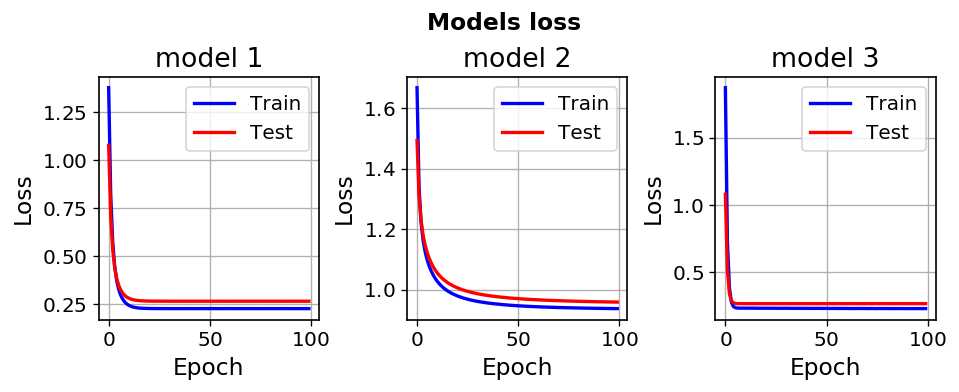

In [319]:
# look into training history
# Plot training & validation loss values
plt.figure(figsize=(9, 3), dpi=120)
plt.suptitle('Models loss', size=14)
mpl.rcParams['figure.subplot.top'] = 0.8

for i in range(len(models)):
    plt.subplot(1, 3, i+1);
    plt.plot(history[i].history['loss'], 'b')
    plt.plot(history[i].history['val_loss'], 'r')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.title('model {}'.format(i+1))
    plt.legend(['Train', 'Test'])
plt.show()

#### --> Model's performance evaluation and prediction

7/7 [==============================] - 0s 2ms/step - loss: 0.0013 - mse: 0.0013

Test loss: [0.0003321771218907088, 0.0003321771218907088]
Test accuracy: [0.6969940662384033, 0.6969940662384033]


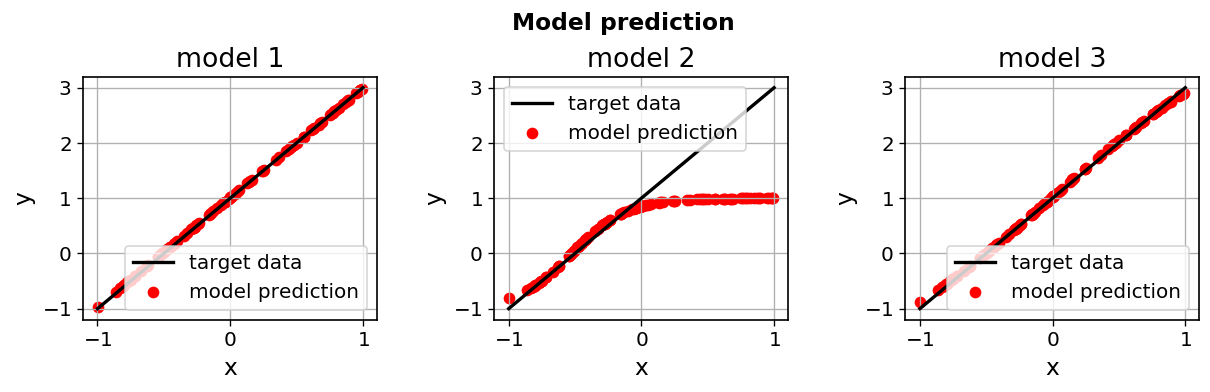

In [320]:
# evaluate model with the exact curve
score = []

for model in models:
    score.append(model.evaluate(x_valid, 
                                y_target, 
                                batch_size=bs, 
                                verbose=1))
## print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

x_predicted = np.random.uniform(-1, 1, 100)
y_predicted = []
for model in models:
    y_predicted.append(model.predict(x_predicted))

plt.figure(figsize=(12, 3), dpi=120)
plt.suptitle('Model prediction', size=14)
mpl.rcParams['figure.subplot.top'] = 0.8

for i in range(len(models)):
    plt.subplot(1, 3, i+1);
    plt.scatter(x_predicted, y_predicted[i], color='red', label = 'model prediction')
    plt.plot(x_valid, y_target, color = 'black', label = 'target data')
    plt.xlabel("x")
    plt.ylabel("y")
    plt.legend()
    plt.title('model {}'.format(i+1))
plt.show()

###   B. Polynomial Regression

$$
f(x)=a + bx+cx^2+dx^3 \qquad \text{for} \  x \in [-1,1]
$$



#### --> setting the polynomial regression problem

In [321]:
a = 4.
b = -3.
c = -2.
d = 3.

#### --> Generate training and validation set

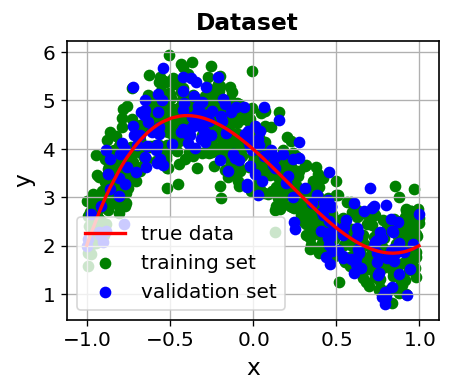

In [323]:
Npoints = 1000 ## number of points in the dataset 
Ntrain = int(0.8*Npoints) ## number of points in the training set
Nvalid = int(0.2*Npoints) ## number of points in the validation set

np.random.seed(0) ## fixing seed for reproducibility
x_train = np.random.uniform(-1, 1, Ntrain)
x_valid = np.random.uniform(-1, 1, Nvalid)
x_valid.sort()

sigma = 0.5 # gaussian noise on the training and validation set
y_target = a + b*x_valid+c*x_valid**2+d*x_valid**3
y_train = np.random.normal(a + b*x_train+c*x_train**2+d*x_train**3, sigma) # actual measures
y_valid = np.random.normal(a + b*x_valid+c*x_valid**2+d*x_valid**3, sigma)

# plot training and target dataset
plt.figure(figsize=(4, 3), dpi=120)
plt.suptitle('Dataset', size=14)
mpl.rcParams['figure.subplot.top'] = 0.9
plt.plot(x_valid, y_target, color='red', label = 'true data')
plt.scatter(x_train, y_train, color = 'green', label = 'training set')
plt.scatter(x_valid, y_valid, color='blue', label = 'validation set')
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

#### ---> Define the NN model

In [324]:
Nnodes_in = 1
Nnodes_out = 1

models = []

## DEFINE DIFFERENT MODELS

## 1. No Hidden Layer / linear activation function /
models.append(tf.keras.Sequential())
models[0].add(Dense(Nnodes_out, input_shape=(Nnodes_in,), activation = 'linear'))

## 2. 1 Hidden Layer / nonlinear activation functions + linear
models.append(tf.keras.Sequential())
models[1].add(Dense(16, input_shape=(Nnodes_in,), activation = 'sigmoid'))
models[1].add(Dense(Nnodes_out, activation = 'linear'))

## 3. 2 Hidden Layers / nonlinear activation functions + linear
models.append(tf.keras.Sequential())
models[2].add(Dense(16, input_shape=(Nnodes_in,), activation = 'tanh'))
models[2].add(Dense(16, activation = 'tanh'))
models[2].add(Dense(Nnodes_out, activation = 'linear'))

## optimizer
##opt = tf.keras.optimizers.Adam(learning_rate=0.01,
##    beta_1=0.9,
##    beta_2=0.999,
##    epsilon=1e-07,
##    amsgrad=False)

## compile the model
for model in models:
    model.compile(optimizer='sgd', loss='mse', metrics=['mse'])

# get a summary 
for model in models:
    model.summary()

Model: "sequential_132"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_195 (Dense)            (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_133"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_196 (Dense)            (None, 16)                32        
_________________________________________________________________
dense_197 (Dense)            (None, 1)                 17        
Total params: 49
Trainable params: 49
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_134"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_198 (Den

#### --> Define the learning protocol and train the NN

In [325]:
Nepochs = [50, 500, 500]
bs = 32 ## typical values are 1 (pure SGD) 16 32 64 128 256

# report training progress against validation data
history = []
i = 1
for model in models:
    print("\n***Training model {}:*** ".format(i))
    history.append(model.fit(x=x_train, 
                             y=y_train, 
                             batch_size=bs, 
                             epochs=Nepochs[i-1],
                             shuffle=True,
                             validation_data=(x_valid, y_valid)))
    i = i+1
# return weights
for model in models:
    model.get_weights()


***Training model 1:*** 
Epoch 1/50
25/25 [==============================] - 0s 6ms/step - loss: 8.4012 - mse: 8.4012 - val_loss: 5.3178 - val_mse: 5.3178
Epoch 2/50
25/25 [==============================] - 0s 4ms/step - loss: 3.6409 - mse: 3.6409 - val_loss: 2.5866 - val_mse: 2.5866
Epoch 3/50
25/25 [==============================] - 0s 4ms/step - loss: 1.8767 - mse: 1.8767 - val_loss: 1.5594 - val_mse: 1.5594
Epoch 4/50
25/25 [==============================] - 0s 4ms/step - loss: 1.2142 - mse: 1.2142 - val_loss: 1.1588 - val_mse: 1.1588
Epoch 5/50
25/25 [==============================] - 0s 4ms/step - loss: 0.9584 - mse: 0.9584 - val_loss: 0.9943 - val_mse: 0.9943
Epoch 6/50
25/25 [==============================] - 0s 3ms/step - loss: 0.8546 - mse: 0.8546 - val_loss: 0.9192 - val_mse: 0.9192
Epoch 7/50
25/25 [==============================] - 0s 4ms/step - loss: 0.8091 - mse: 0.8091 - val_loss: 0.8810 - val_mse: 0.8810
Epoch 8/50
25/25 [==============================] - 0s 4ms/step 

25/25 [==============================] - 0s 6ms/step - loss: 0.7198 - mse: 0.7198 - val_loss: 0.7612 - val_mse: 0.7612
Epoch 76/500
25/25 [==============================] - 0s 7ms/step - loss: 0.7194 - mse: 0.7194 - val_loss: 0.7597 - val_mse: 0.7597
Epoch 77/500
25/25 [==============================] - 0s 5ms/step - loss: 0.7182 - mse: 0.7182 - val_loss: 0.7607 - val_mse: 0.7607
Epoch 78/500
25/25 [==============================] - 0s 5ms/step - loss: 0.7194 - mse: 0.7194 - val_loss: 0.7599 - val_mse: 0.7599
Epoch 79/500
25/25 [==============================] - 0s 5ms/step - loss: 0.7176 - mse: 0.7176 - val_loss: 0.7614 - val_mse: 0.7614
Epoch 80/500
25/25 [==============================] - 0s 7ms/step - loss: 0.7179 - mse: 0.7179 - val_loss: 0.7561 - val_mse: 0.7561
Epoch 81/500
25/25 [==============================] - 0s 7ms/step - loss: 0.7171 - mse: 0.7171 - val_loss: 0.7561 - val_mse: 0.7561
Epoch 82/500
25/25 [==============================] - 0s 6ms/step - loss: 0.7159 - mse: 0

Epoch 137/500
25/25 [==============================] - 0s 4ms/step - loss: 0.6773 - mse: 0.6773 - val_loss: 0.7170 - val_mse: 0.7170
Epoch 138/500
25/25 [==============================] - 0s 4ms/step - loss: 0.6765 - mse: 0.6765 - val_loss: 0.7116 - val_mse: 0.7116
Epoch 139/500
25/25 [==============================] - 0s 4ms/step - loss: 0.6771 - mse: 0.6771 - val_loss: 0.7112 - val_mse: 0.7112
Epoch 140/500
25/25 [==============================] - 0s 4ms/step - loss: 0.6749 - mse: 0.6749 - val_loss: 0.7101 - val_mse: 0.7101
Epoch 141/500
25/25 [==============================] - 0s 4ms/step - loss: 0.6742 - mse: 0.6742 - val_loss: 0.7089 - val_mse: 0.7089
Epoch 142/500
25/25 [==============================] - 0s 7ms/step - loss: 0.6730 - mse: 0.6730 - val_loss: 0.7074 - val_mse: 0.7074
Epoch 143/500
25/25 [==============================] - 0s 4ms/step - loss: 0.6722 - mse: 0.6722 - val_loss: 0.7067 - val_mse: 0.7067
Epoch 144/500
25/25 [==============================] - 0s 4ms/step - 

Epoch 260/500
25/25 [==============================] - 0s 4ms/step - loss: 0.5520 - mse: 0.5520 - val_loss: 0.5809 - val_mse: 0.5809
Epoch 261/500
25/25 [==============================] - 0s 3ms/step - loss: 0.5510 - mse: 0.5510 - val_loss: 0.5772 - val_mse: 0.5772
Epoch 262/500
25/25 [==============================] - 0s 3ms/step - loss: 0.5502 - mse: 0.5502 - val_loss: 0.5771 - val_mse: 0.5771
Epoch 263/500
25/25 [==============================] - 0s 3ms/step - loss: 0.5487 - mse: 0.5487 - val_loss: 0.5763 - val_mse: 0.5763
Epoch 264/500
25/25 [==============================] - 0s 4ms/step - loss: 0.5493 - mse: 0.5493 - val_loss: 0.5729 - val_mse: 0.5729
Epoch 265/500
25/25 [==============================] - 0s 4ms/step - loss: 0.5470 - mse: 0.5470 - val_loss: 0.5724 - val_mse: 0.5724
Epoch 266/500
25/25 [==============================] - 0s 4ms/step - loss: 0.5455 - mse: 0.5455 - val_loss: 0.5737 - val_mse: 0.5737
Epoch 267/500
25/25 [==============================] - 0s 3ms/step - 

Epoch 383/500
25/25 [==============================] - 0s 6ms/step - loss: 0.4300 - mse: 0.4300 - val_loss: 0.4608 - val_mse: 0.4608
Epoch 384/500
25/25 [==============================] - 0s 7ms/step - loss: 0.4300 - mse: 0.4300 - val_loss: 0.4634 - val_mse: 0.4634
Epoch 385/500
25/25 [==============================] - 0s 6ms/step - loss: 0.4303 - mse: 0.4303 - val_loss: 0.4565 - val_mse: 0.4565
Epoch 386/500
25/25 [==============================] - 0s 6ms/step - loss: 0.4285 - mse: 0.4285 - val_loss: 0.4554 - val_mse: 0.4554
Epoch 387/500
25/25 [==============================] - 0s 6ms/step - loss: 0.4276 - mse: 0.4276 - val_loss: 0.4547 - val_mse: 0.4547
Epoch 388/500
25/25 [==============================] - 0s 4ms/step - loss: 0.4262 - mse: 0.4262 - val_loss: 0.4558 - val_mse: 0.4558
Epoch 389/500
25/25 [==============================] - 0s 5ms/step - loss: 0.4263 - mse: 0.4263 - val_loss: 0.4543 - val_mse: 0.4543
Epoch 390/500
25/25 [==============================] - 0s 5ms/step - 

25/25 [==============================] - 0s 4ms/step - loss: 0.5838 - mse: 0.5838 - val_loss: 0.6074 - val_mse: 0.6074
Epoch 6/500
25/25 [==============================] - 0s 4ms/step - loss: 0.5718 - mse: 0.5718 - val_loss: 0.5939 - val_mse: 0.5939
Epoch 7/500
25/25 [==============================] - 0s 4ms/step - loss: 0.5578 - mse: 0.5578 - val_loss: 0.5836 - val_mse: 0.5836
Epoch 8/500
25/25 [==============================] - 0s 3ms/step - loss: 0.5445 - mse: 0.5445 - val_loss: 0.5670 - val_mse: 0.5670
Epoch 9/500
25/25 [==============================] - 0s 3ms/step - loss: 0.5321 - mse: 0.5321 - val_loss: 0.5496 - val_mse: 0.5496
Epoch 10/500
25/25 [==============================] - 0s 5ms/step - loss: 0.5190 - mse: 0.5190 - val_loss: 0.5336 - val_mse: 0.5336
Epoch 11/500
25/25 [==============================] - 0s 8ms/step - loss: 0.5052 - mse: 0.5052 - val_loss: 0.5214 - val_mse: 0.5214
Epoch 12/500
25/25 [==============================] - 0s 6ms/step - loss: 0.4904 - mse: 0.490

Epoch 129/500
25/25 [==============================] - 0s 4ms/step - loss: 0.2351 - mse: 0.2351 - val_loss: 0.2835 - val_mse: 0.2835
Epoch 130/500
25/25 [==============================] - 0s 3ms/step - loss: 0.2356 - mse: 0.2356 - val_loss: 0.2827 - val_mse: 0.2827
Epoch 131/500
25/25 [==============================] - 0s 5ms/step - loss: 0.2346 - mse: 0.2346 - val_loss: 0.2831 - val_mse: 0.2831
Epoch 132/500
25/25 [==============================] - 0s 6ms/step - loss: 0.2353 - mse: 0.2353 - val_loss: 0.2827 - val_mse: 0.2827
Epoch 133/500
25/25 [==============================] - 0s 6ms/step - loss: 0.2350 - mse: 0.2350 - val_loss: 0.2842 - val_mse: 0.2842
Epoch 134/500
25/25 [==============================] - 0s 6ms/step - loss: 0.2352 - mse: 0.2352 - val_loss: 0.2823 - val_mse: 0.2823
Epoch 135/500
25/25 [==============================] - 0s 6ms/step - loss: 0.2345 - mse: 0.2345 - val_loss: 0.2823 - val_mse: 0.2823
Epoch 136/500
25/25 [==============================] - 0s 6ms/step - 

Epoch 252/500
25/25 [==============================] - 0s 3ms/step - loss: 0.2307 - mse: 0.2307 - val_loss: 0.2757 - val_mse: 0.2757
Epoch 253/500
25/25 [==============================] - 0s 5ms/step - loss: 0.2307 - mse: 0.2307 - val_loss: 0.2750 - val_mse: 0.2750
Epoch 254/500
25/25 [==============================] - 0s 6ms/step - loss: 0.2302 - mse: 0.2302 - val_loss: 0.2795 - val_mse: 0.2795
Epoch 255/500
25/25 [==============================] - 0s 4ms/step - loss: 0.2312 - mse: 0.2312 - val_loss: 0.2767 - val_mse: 0.2767
Epoch 256/500
25/25 [==============================] - 0s 5ms/step - loss: 0.2303 - mse: 0.2303 - val_loss: 0.2773 - val_mse: 0.2773
Epoch 257/500
25/25 [==============================] - 0s 5ms/step - loss: 0.2295 - mse: 0.2295 - val_loss: 0.2752 - val_mse: 0.2752
Epoch 258/500
25/25 [==============================] - 0s 5ms/step - loss: 0.2308 - mse: 0.2308 - val_loss: 0.2762 - val_mse: 0.2762
Epoch 259/500
25/25 [==============================] - 0s 5ms/step - 

Epoch 375/500
25/25 [==============================] - 0s 3ms/step - loss: 0.2289 - mse: 0.2289 - val_loss: 0.2720 - val_mse: 0.2720
Epoch 376/500
25/25 [==============================] - 0s 5ms/step - loss: 0.2291 - mse: 0.2291 - val_loss: 0.2725 - val_mse: 0.2725
Epoch 377/500
25/25 [==============================] - 0s 6ms/step - loss: 0.2282 - mse: 0.2282 - val_loss: 0.2731 - val_mse: 0.2731
Epoch 378/500
25/25 [==============================] - 0s 5ms/step - loss: 0.2293 - mse: 0.2293 - val_loss: 0.2723 - val_mse: 0.2723
Epoch 379/500
25/25 [==============================] - 0s 3ms/step - loss: 0.2287 - mse: 0.2287 - val_loss: 0.2716 - val_mse: 0.2716
Epoch 380/500
25/25 [==============================] - 0s 3ms/step - loss: 0.2290 - mse: 0.2290 - val_loss: 0.2716 - val_mse: 0.2716
Epoch 381/500
25/25 [==============================] - 0s 4ms/step - loss: 0.2286 - mse: 0.2286 - val_loss: 0.2718 - val_mse: 0.2718
Epoch 382/500
25/25 [==============================] - 0s 4ms/step - 

Epoch 498/500
25/25 [==============================] - 0s 4ms/step - loss: 0.2275 - mse: 0.2275 - val_loss: 0.2706 - val_mse: 0.2706
Epoch 499/500
25/25 [==============================] - 0s 5ms/step - loss: 0.2280 - mse: 0.2280 - val_loss: 0.2705 - val_mse: 0.2705
Epoch 500/500
25/25 [==============================] - 0s 5ms/step - loss: 0.2280 - mse: 0.2280 - val_loss: 0.2718 - val_mse: 0.2718


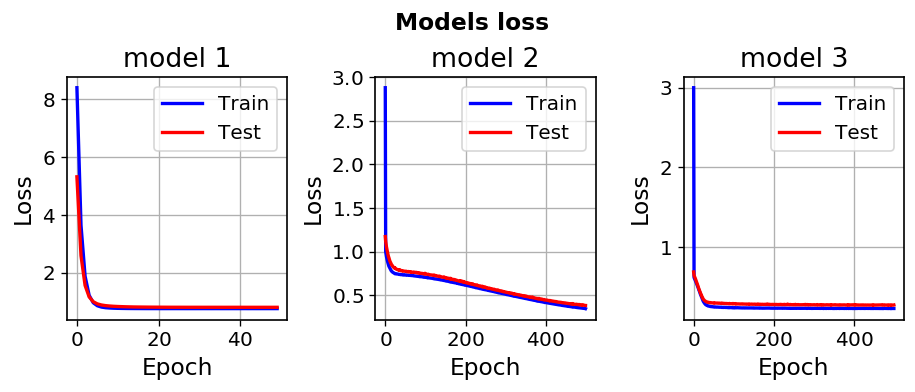

In [327]:
# look into training history
# Plot training & validation loss values
plt.figure(figsize=(9, 3), dpi=120)
plt.suptitle('Models loss', size=14)
mpl.rcParams['figure.subplot.top'] = 0.8

for i in range(len(models)):
    plt.subplot(1, 3, i+1);
    plt.plot(history[i].history['loss'], 'b')
    plt.plot(history[i].history['val_loss'], 'r')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.title('model {}'.format(i+1))
    plt.legend(['Train', 'Test'])
plt.show()

#### --> Model's performance evaluation and prediction

7/7 [==============================] - 0s 1ms/step - loss: 0.0055 - mse: 0.0055

Test loss: [0.5167257785797119, 0.5167257785797119]
Test accuracy: [0.11716826260089874, 0.11716826260089874]


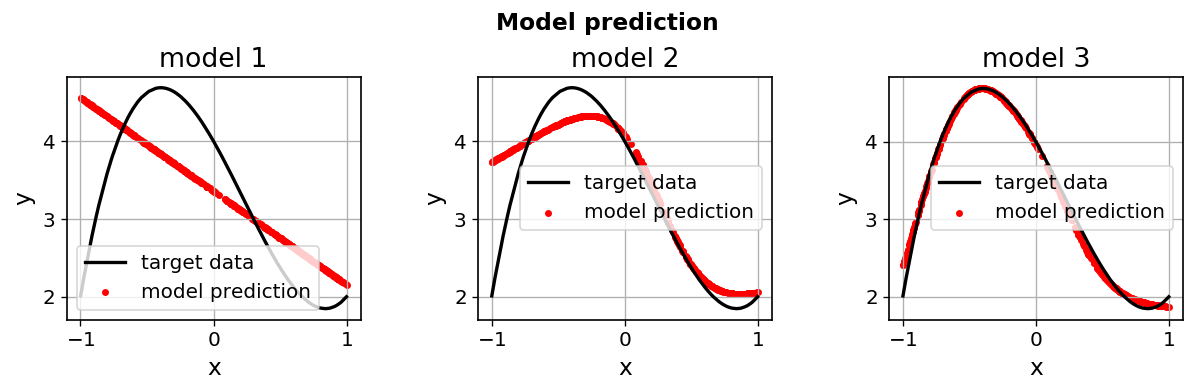

In [329]:
# evaluate model with the exact curve
score = []

for model in models:
    score.append(model.evaluate(x_valid, 
                                y_target, 
                                batch_size=bs, 
                                verbose=1))
## print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

x_predicted = np.random.uniform(-1, 1, 500)
y_predicted = []
for model in models:
    y_predicted.append(model.predict(x_predicted))

plt.figure(figsize=(12, 3), dpi=120)
plt.suptitle('Model prediction', size=14)
mpl.rcParams['figure.subplot.top'] = 0.8

for i in range(len(models)):
    plt.subplot(1, 3, i+1);
    plt.scatter(x_predicted, y_predicted[i], color='red', s=10, label = 'model prediction')
    plt.plot(x_valid, y_target, color = 'black', label = 'target data')
    plt.xlabel("x")
    plt.ylabel("y")
    plt.legend()
    plt.title('model {}'.format(i+1))
plt.show()

###   C. Regression on a 2D trigonometric function

$$f(x,y) = \sin(x^2+y^2) \qquad \qquad  x \in [-3/2,3/2], \ \ y \in [-3/2,3/2]$$.

#### --> Generate training and validation set

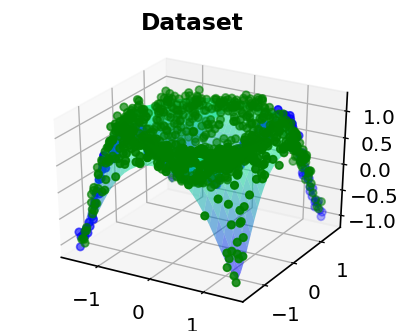

In [331]:
Npoints = 1000 ## number of points in the dataset 
Ntrain = int(0.8*Npoints) ## number of points in the training set
Nvalid = int(0.2*Npoints) ## number of points in the validation set

np.random.seed(0) ## fixing seed for reproducibility
x_train = np.random.uniform(-3/2, 3/2, Ntrain)
y_train = np.random.uniform(-3/2, 3/2, Ntrain)

x_valid = np.random.uniform(-3/2, 3/2, Nvalid)
y_valid = np.random.uniform(-3/2, 3/2, Nvalid)

x_valid.sort()
y_valid.sort()

z_target=np.sin(x_valid**2+y_valid**2)

sigma = 0.1 ## gaussian noise on the training and validation set
z_train=np.random.normal(np.sin(x_train**2+y_train**2), sigma) 
z_valid = np.random.normal(np.sin(x_valid**2+y_valid**2), sigma)

# plot training and target dataset
plt.figure(figsize=(4, 3), dpi=120)
plt.suptitle('Dataset', size=14)
mpl.rcParams['figure.subplot.top'] = 0.9

x = np.linspace(-3/2, 3/2, 30)
y = np.linspace(-3/2, 3/2, 30)
X, Y = np.meshgrid(x, y)
Z = np.sin(X**2+Y**2)

ax = plt.axes(projection="3d")
ax.plot_surface(X, Y, Z, 
                rstride=1, cstride=1, cmap='winter', edgecolor='none',
                alpha=0.5, label='true data')
#ax.scatter(x_valid, y_valid, z_target, marker = 'o', color = 'red', label = 'true data')
ax.scatter(x_train, y_train, z_train, marker='o', color = 'green', label = 'training set')
ax.scatter(x_valid, y_valid, z_valid, marker='o', color = 'blue', label = 'validation set')
plt.show()


#### ---> Define the NN model

In [332]:
Nnodes_in = 2
Nnodes_out = 1

## 2 Hidden Layers / nonlinear activation functions + linear
model = tf.keras.Sequential()
model.add(Dense(16, input_shape=(Nnodes_in,), activation = 'tanh'))
model.add(Dense(16, activation = 'tanh'))
model.add(Dense(Nnodes_out, activation = 'linear'))

## compile the model
model.compile(optimizer='sgd', loss='mse', metrics=['mse'])

# get a summary 
model.summary()

Model: "sequential_135"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_201 (Dense)            (None, 16)                48        
_________________________________________________________________
dense_202 (Dense)            (None, 16)                272       
_________________________________________________________________
dense_203 (Dense)            (None, 1)                 17        
Total params: 337
Trainable params: 337
Non-trainable params: 0
_________________________________________________________________


#### --> Define the learning protocol and train the NN

In [333]:
Nepochs = 500
bs = 32 ## typical values are 1 (pure SGD) 16 32 64 128 256

xy_valid=np.array([
    [x_valid[i],y_valid[i]] for i in range(Nvalid)
])
xy_train=np.array([
    [x_train[i],y_train[i]] for i in range(Ntrain)
])

# report training progress against validation data
print("\n***Training model 1:*** ")
history = model.fit(x=xy_train, y=z_train, batch_size=bs, epochs=Nepochs, 
                    shuffle=True, validation_data=(xy_valid, z_valid))

model.get_weights()


***Training model 1:*** 
Epoch 1/500
25/25 [==============================] - 0s 7ms/step - loss: 0.3288 - mse: 0.3288 - val_loss: 0.2924 - val_mse: 0.2924
Epoch 2/500
25/25 [==============================] - 0s 4ms/step - loss: 0.1819 - mse: 0.1819 - val_loss: 0.3207 - val_mse: 0.3207
Epoch 3/500
25/25 [==============================] - 0s 4ms/step - loss: 0.1697 - mse: 0.1697 - val_loss: 0.3341 - val_mse: 0.3341
Epoch 4/500
25/25 [==============================] - 0s 4ms/step - loss: 0.1684 - mse: 0.1684 - val_loss: 0.3399 - val_mse: 0.3399
Epoch 5/500
25/25 [==============================] - 0s 3ms/step - loss: 0.1685 - mse: 0.1685 - val_loss: 0.3388 - val_mse: 0.3388
Epoch 6/500
25/25 [==============================] - 0s 4ms/step - loss: 0.1684 - mse: 0.1684 - val_loss: 0.3386 - val_mse: 0.3386
Epoch 7/500
25/25 [==============================] - 0s 3ms/step - loss: 0.1684 - mse: 0.1684 - val_loss: 0.3396 - val_mse: 0.3396
Epoch 8/500
25/25 [==============================] - 0s 3

Epoch 63/500
25/25 [==============================] - 0s 4ms/step - loss: 0.1662 - mse: 0.1662 - val_loss: 0.3420 - val_mse: 0.3420
Epoch 64/500
25/25 [==============================] - 0s 4ms/step - loss: 0.1660 - mse: 0.1660 - val_loss: 0.3460 - val_mse: 0.3460
Epoch 65/500
25/25 [==============================] - 0s 5ms/step - loss: 0.1660 - mse: 0.1660 - val_loss: 0.3480 - val_mse: 0.3480
Epoch 66/500
25/25 [==============================] - 0s 5ms/step - loss: 0.1662 - mse: 0.1662 - val_loss: 0.3433 - val_mse: 0.3433
Epoch 67/500
25/25 [==============================] - 0s 4ms/step - loss: 0.1661 - mse: 0.1661 - val_loss: 0.3408 - val_mse: 0.3408
Epoch 68/500
25/25 [==============================] - 0s 3ms/step - loss: 0.1659 - mse: 0.1659 - val_loss: 0.3429 - val_mse: 0.3429
Epoch 69/500
25/25 [==============================] - 0s 4ms/step - loss: 0.1659 - mse: 0.1659 - val_loss: 0.3419 - val_mse: 0.3419
Epoch 70/500
25/25 [==============================] - 0s 4ms/step - loss: 0.

Epoch 125/500
25/25 [==============================] - 0s 3ms/step - loss: 0.1637 - mse: 0.1637 - val_loss: 0.3448 - val_mse: 0.3448
Epoch 126/500
25/25 [==============================] - 0s 3ms/step - loss: 0.1636 - mse: 0.1636 - val_loss: 0.3404 - val_mse: 0.3404
Epoch 127/500
25/25 [==============================] - 0s 4ms/step - loss: 0.1635 - mse: 0.1635 - val_loss: 0.3427 - val_mse: 0.3427
Epoch 128/500
25/25 [==============================] - 0s 5ms/step - loss: 0.1634 - mse: 0.1634 - val_loss: 0.3418 - val_mse: 0.3418
Epoch 129/500
25/25 [==============================] - 0s 5ms/step - loss: 0.1637 - mse: 0.1637 - val_loss: 0.3424 - val_mse: 0.3424
Epoch 130/500
25/25 [==============================] - 0s 5ms/step - loss: 0.1632 - mse: 0.1632 - val_loss: 0.3374 - val_mse: 0.3374
Epoch 131/500
25/25 [==============================] - 0s 7ms/step - loss: 0.1634 - mse: 0.1634 - val_loss: 0.3373 - val_mse: 0.3373
Epoch 132/500
25/25 [==============================] - 0s 5ms/step - 

Epoch 248/500
25/25 [==============================] - 0s 3ms/step - loss: 0.1444 - mse: 0.1444 - val_loss: 0.3057 - val_mse: 0.3057
Epoch 249/500
25/25 [==============================] - 0s 3ms/step - loss: 0.1438 - mse: 0.1438 - val_loss: 0.3056 - val_mse: 0.3056
Epoch 250/500
25/25 [==============================] - 0s 4ms/step - loss: 0.1437 - mse: 0.1437 - val_loss: 0.3040 - val_mse: 0.3040
Epoch 251/500
25/25 [==============================] - 0s 3ms/step - loss: 0.1433 - mse: 0.1433 - val_loss: 0.3016 - val_mse: 0.3016
Epoch 252/500
25/25 [==============================] - 0s 4ms/step - loss: 0.1436 - mse: 0.1436 - val_loss: 0.3026 - val_mse: 0.3026
Epoch 253/500
25/25 [==============================] - 0s 4ms/step - loss: 0.1432 - mse: 0.1432 - val_loss: 0.3032 - val_mse: 0.3032
Epoch 254/500
25/25 [==============================] - 0s 4ms/step - loss: 0.1428 - mse: 0.1428 - val_loss: 0.3025 - val_mse: 0.3025
Epoch 255/500
25/25 [==============================] - 0s 4ms/step - 

Epoch 371/500
25/25 [==============================] - 0s 4ms/step - loss: 0.1263 - mse: 0.1263 - val_loss: 0.2423 - val_mse: 0.2423
Epoch 372/500
25/25 [==============================] - 0s 4ms/step - loss: 0.1260 - mse: 0.1260 - val_loss: 0.2405 - val_mse: 0.2405
Epoch 373/500
25/25 [==============================] - 0s 4ms/step - loss: 0.1261 - mse: 0.1261 - val_loss: 0.2414 - val_mse: 0.2414
Epoch 374/500
25/25 [==============================] - 0s 5ms/step - loss: 0.1259 - mse: 0.1259 - val_loss: 0.2469 - val_mse: 0.2469
Epoch 375/500
25/25 [==============================] - 0s 6ms/step - loss: 0.1261 - mse: 0.1261 - val_loss: 0.2405 - val_mse: 0.2405
Epoch 376/500
25/25 [==============================] - 0s 3ms/step - loss: 0.1253 - mse: 0.1253 - val_loss: 0.2429 - val_mse: 0.2429
Epoch 377/500
25/25 [==============================] - 0s 3ms/step - loss: 0.1258 - mse: 0.1258 - val_loss: 0.2376 - val_mse: 0.2376
Epoch 378/500
25/25 [==============================] - 0s 5ms/step - 

Epoch 494/500
25/25 [==============================] - 0s 3ms/step - loss: 0.1178 - mse: 0.1178 - val_loss: 0.2071 - val_mse: 0.2071
Epoch 495/500
25/25 [==============================] - 0s 3ms/step - loss: 0.1177 - mse: 0.1177 - val_loss: 0.2029 - val_mse: 0.2029
Epoch 496/500
25/25 [==============================] - 0s 4ms/step - loss: 0.1174 - mse: 0.1174 - val_loss: 0.1987 - val_mse: 0.1987
Epoch 497/500
25/25 [==============================] - 0s 5ms/step - loss: 0.1174 - mse: 0.1174 - val_loss: 0.1956 - val_mse: 0.1956
Epoch 498/500
25/25 [==============================] - 0s 4ms/step - loss: 0.1168 - mse: 0.1168 - val_loss: 0.2131 - val_mse: 0.2131
Epoch 499/500
25/25 [==============================] - 0s 3ms/step - loss: 0.1175 - mse: 0.1175 - val_loss: 0.2065 - val_mse: 0.2065
Epoch 500/500
25/25 [==============================] - 0s 4ms/step - loss: 0.1175 - mse: 0.1175 - val_loss: 0.1996 - val_mse: 0.1996


[array([[-0.47896332, -0.516376  , -0.71629983, -0.17259373, -0.36404485,
          0.2374589 , -0.09350119,  0.39448   , -0.12011518, -0.32845214,
          0.07029711,  0.29709134, -0.12324927,  0.5739003 ,  0.47987616,
         -0.3573628 ],
        [-0.34397948, -0.30345893, -0.61543196, -0.21902034, -0.4108988 ,
          0.00186414,  0.12062808,  0.4137107 , -0.550813  , -0.01153591,
         -0.10868011,  0.20235743, -0.44965354,  0.6459143 ,  0.14319862,
         -0.25178552]], dtype=float32),
 array([ 0.24030395,  0.2811455 ,  0.24086767,  0.03551864,  0.1146403 ,
        -0.05762609, -0.01057052,  0.72961384,  0.35064074,  0.1273008 ,
        -0.12996687, -0.06070731, -0.06223174, -0.1343123 , -0.21937577,
        -0.36867025], dtype=float32),
 array([[-4.66939099e-02,  5.08378632e-02,  6.27533376e-01,
          1.09287977e-01,  2.01947704e-01, -8.65479279e-03,
          5.22269271e-02, -2.58439798e-02,  6.90378174e-02,
          1.91478938e-01,  1.23458840e-01,  4.23545271e-

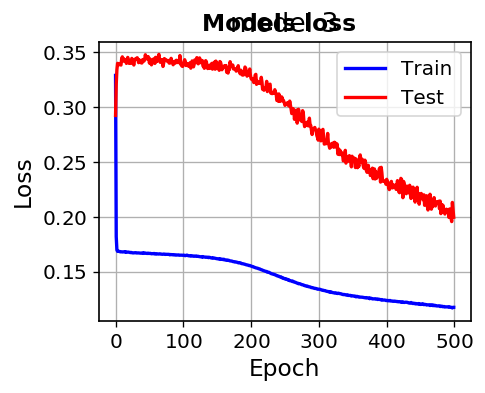

In [334]:
# look into training history
# Plot training & validation loss values
plt.figure(figsize=(4, 3), dpi=120)
plt.suptitle('Models loss', size=14)
mpl.rcParams['figure.subplot.top'] = 0.8

plt.plot(history.history['loss'], 'b')
plt.plot(history.history['val_loss'], 'r')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.title('model {}'.format(i+1))
plt.legend(['Train', 'Test'])
plt.show()

#### --> Model's performance evaluation and prediction

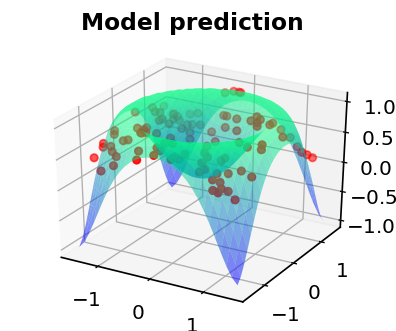

In [336]:
x_predicted = np.random.uniform(-1.5, 1.5, 100)
y_predicted = np.random.uniform(-1.5, 1.5, 100)
xy_predicted=np.array([[x_predicted[i],y_predicted[i]] for i in range(100)])

z_predicted = model.predict(xy_predicted)

ax = plt.figure(figsize=(4, 3), dpi=120)
plt.suptitle('Model prediction', size=14)
mpl.rcParams['figure.subplot.top'] = 0.9

ax = plt.axes(projection="3d")
ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                cmap='winter', edgecolor='none',alpha=0.5)
ax.scatter(x_predicted, y_predicted, z_predicted, color = 'red', marker='o')

plt.show()